In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Carga de datos

In [4]:
df = pd.read_csv('../close_normalized_prices.csv').sample(frac=0.1, random_state=42)
df['X'] = df['X'].apply(lambda x: np.fromstring(x.strip("[]"), sep=' '))
df['Y'] = df['Y'].apply(lambda x: np.fromstring(x.strip("[]"), sep=' '))

In [8]:
df.head(5)

,ID,TICK,X,Y
580152,2023-05-09-2023-06-16-DOX,DOX,"[0.72532807, 0.52242932, 0.35541769, 0.4168393...","[0.06694281, -0.15113891, -0.1918564, -0.32850..."
353309,2021-06-11-2021-07-21-HAL,HAL,"[1.0, 0.94672039, 0.96447942, 0.70901593, 0.66...","[0.69398833, 0.80464501, 0.85792336, 0.8278675..."
440137,2023-08-23-2023-10-02-DOCU,DOCU,"[0.01094047, 0.0, 0.02261106, 0.00583473, 0.11...","[0.50182332, 0.63967886, 0.61633826, 0.8037926..."
216201,2022-04-22-2022-06-01-TRGP,TRGP,"[0.95993857, 1.0, 0.8592874, 0.87276172, 0.948...","[0.40757806, 0.39148113, 0.39889664, 0.4402242..."
49013,2022-02-18-2022-03-30-QCOM,QCOM,"[0.15649873, 0.0132624, 0.0, 0.37135273, 0.275...","[0.87533148, 0.90185678, 1.11405845, 0.9177720..."


In [11]:
df.TICK.unique().shape

(798,)

# Visualización con T-SNE

In [5]:
# Import para tsne
from sklearn.manifold import TSNE

In [15]:
tsne = TSNE(n_components=2, random_state=42, metric='cosine', n_jobs=-1)
X = np.array(df['X'].tolist())
X_2d = tsne.fit_transform(X)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


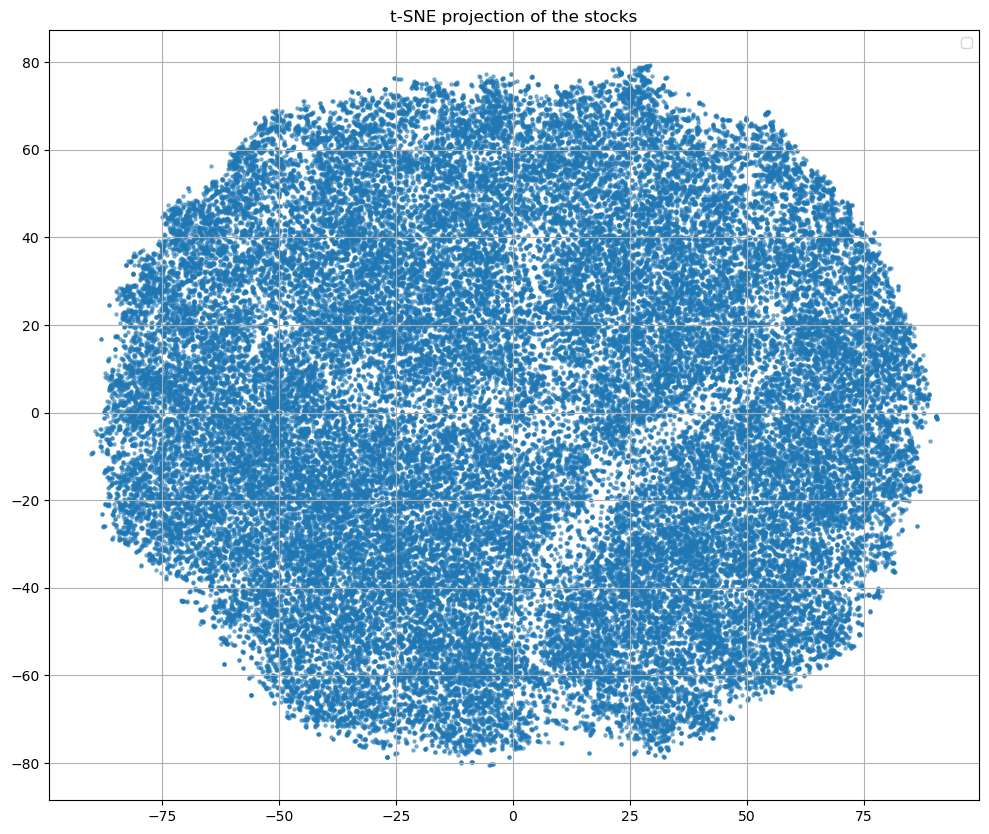

In [16]:
plt.figure(figsize=(12, 10))
plt.scatter(X_2d[:, 0], X_2d[:, 1], s=5, alpha=0.5)
plt.grid(True)
plt.title('t-SNE projection of the stocks')
plt.legend()
plt.show()


# dbscan

In [17]:
# Imports para kmenas
from sklearn.cluster import DBSCAN

In [39]:
# Aplicar DBSCAN con métrica coseno
dbscan = DBSCAN(metric='cosine', eps=0.008, min_samples=15)  # Ajusta eps según dataset
labels = dbscan.fit_predict(X)

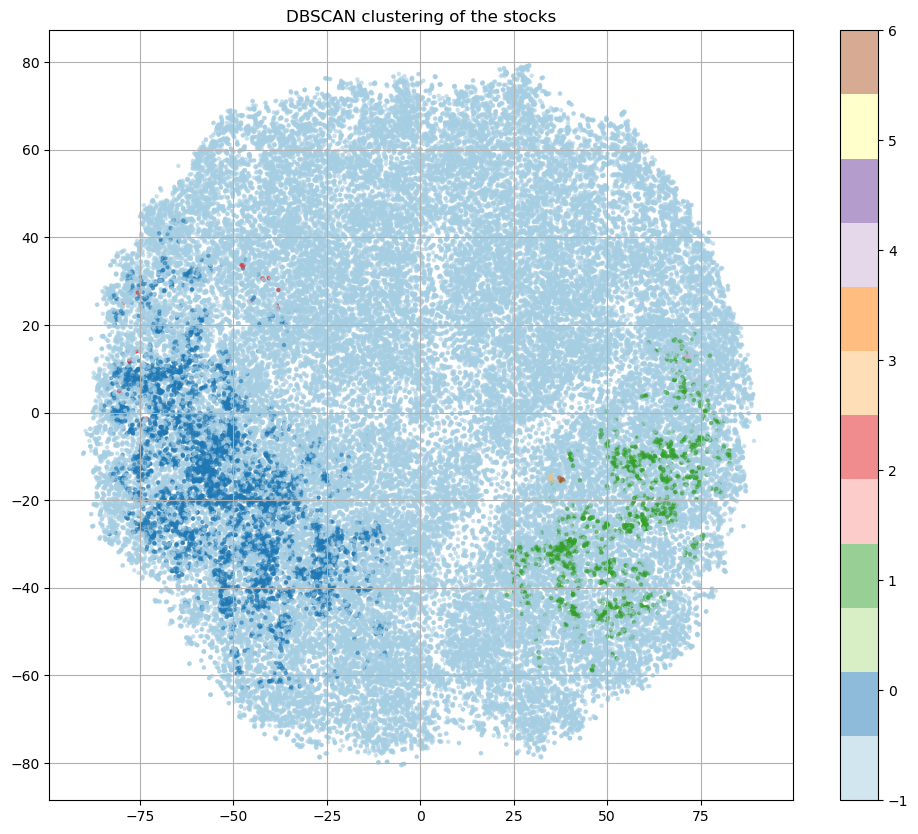

In [42]:
plt.figure(figsize=(12, 10))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, s=5, cmap='Paired', alpha=0.5)
plt.grid(True)
plt.title('DBSCAN clustering of the stocks')
plt.colorbar()
plt.show()

In [44]:
df['cluster'] = labels
df["x_tsne"] = X_2d[:, 0]
df["y_tsne"] = X_2d[:, 1]

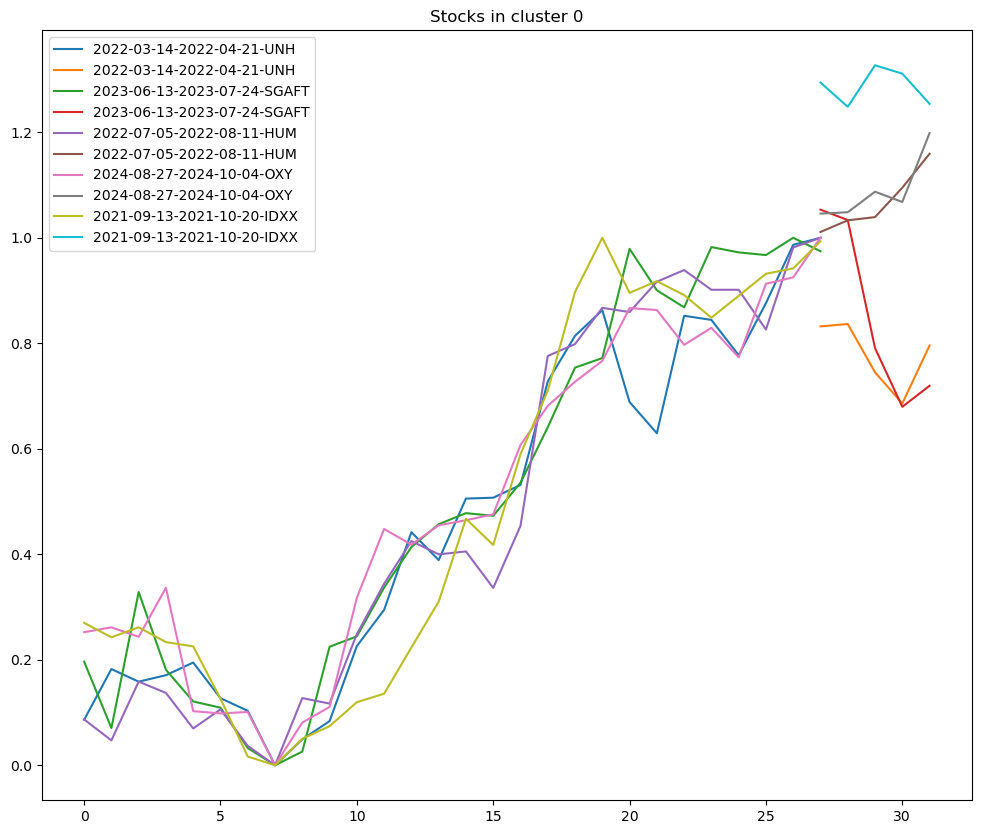

In [56]:
df_cero = df[df['cluster'] == 2]
plt.figure(figsize=(12, 10))
for i in range(5, 10):
    plt.plot(df_cero['X'].iloc[i], label=df_cero['ID'].iloc[i])
    plt.plot(list(range(27,32)),df_cero['Y'].iloc[i],  label=df_cero['ID'].iloc[i])
plt.legend()
plt.title('Stocks in cluster 0')
plt.show()